In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import matplotlib.cm

In [5]:
## пример работы на 1 запуске
completed = subprocess.run(["/home/nikita/infa/pr", "1000"],
                           capture_output=True) 
#(["полный путь к исполняемому файлу", "аргумент"], "сохранение вывода")
#возвращает класс subprocess.CompletedProcess 
completed.stdout #атрибут класса, в котором сохраняется стандартный вывод

b'896'

In [16]:
time16 = np.zeros(len(np.arange(16, 10000000, 100000)))
i = 0
for size in np.arange(16, 10000000, 100000):
    
    completed = subprocess.run(["/home/nikita/infa/16t", str(size)],
                           capture_output=True) 
    time16[i] = int(completed.stdout)
    i+=1

In [17]:
time1 = np.zeros(len(np.arange(16, 10000000, 100000)))
i = 0
for size in np.arange(16, 10000000, 100000):
    
    completed = subprocess.run(["/home/nikita/infa/1t", str(size)],
                           capture_output=True) 
    time1[i] = int(completed.stdout)
    i+=1

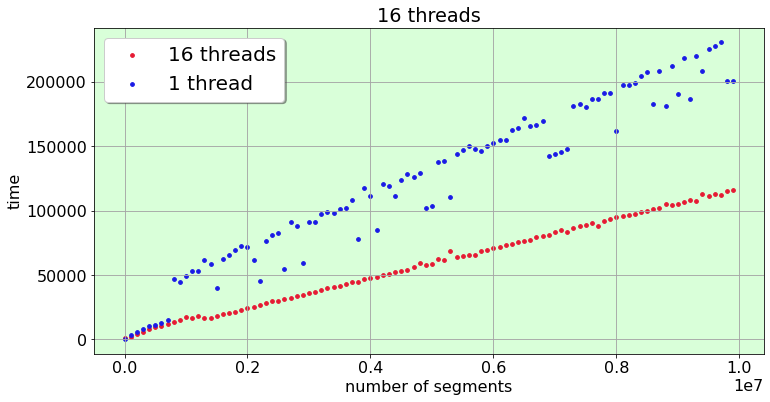

In [18]:
fig, ax = plt.subplots(figsize = (12, 6))

plt.rc('font', size=16) 
ax.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax.set_facecolor((0.85, 1.0, 0.85))
ax.set_xlabel("number of segments")
ax.set_ylabel("time")
ax.set_title("16 threads")

ax.scatter(np.arange(16, 10000000, 100000), time16, 
           color = (0.9, 0.1, 0.2), s = 14, label = '16 threads')
ax.scatter(np.arange(16, 10000000, 100000), time1, 
           color = (0.1, 0.1, 0.9), s = 14, label = '1 thread')
leg = ax.legend(fontsize = '20', shadow = True)

In [41]:
distance_list = [0.2, 0.4, 0.6, 0.8, 1]
min_val, max_val = min(distance_list), max(distance_list)
cmap = matplotlib.cm.coolwarm
norm = matplotlib.colors.Normalize(vmin=min_val, vmax=max_val)
color_list = cmap(distance_list)
color_list

array([[0.48385433, 0.62204985, 0.9748082 , 1.        ],
       [0.75361062, 0.83023285, 0.96087116, 1.        ],
       [0.9473454 , 0.7946955 , 0.71699051, 1.        ],
       [0.9318313 , 0.51908552, 0.40647961, 1.        ],
       [0.70567316, 0.01555616, 0.15023281, 1.        ]])

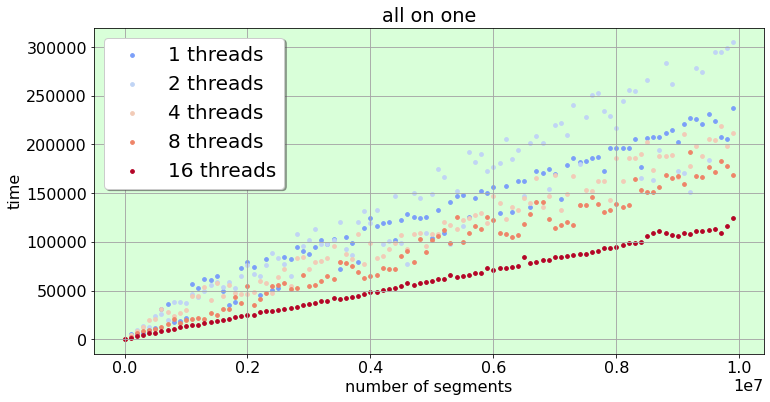

In [42]:
time = np.zeros((5, len(np.arange(16, 10000000, 100000))))
i = 0
j = 0
fig, ax = plt.subplots(figsize = (12, 6))

plt.rc('font', size=16) 
ax.grid(color = (0.65, 0.65, 0.65), linewidth = 0.9)
ax.set_facecolor((0.85, 1.0, 0.85))
ax.set_xlabel("number of segments")
ax.set_ylabel("time")
ax.set_title("all on one")

for cnt in (1, 2, 4, 8, 16):
    for size in np.arange(16, 10000000, 100000):
        completed = subprocess.run(["/home/nikita/infa/test", str(size), str(cnt)],
                               capture_output=True) 
        time[j, i] = int(completed.stdout)
        i+=1
    ax.scatter(np.arange(16, 10000000, 100000), time[j], 
           color = color_list[j], s = 14, label = f'{cnt} threads')
    i = 0
    j+=1
leg = ax.legend(fontsize = '20', shadow = True)